In [ ]:
import pandas as pd
import numpy as np
import itertools
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import math
from sklearn.datasets import make_blobs
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.spatial import ConvexHull

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
AprFF = pd.read_csv("/content/drive/MyDrive/NSSTC/Fires/Fires Dataset/2021_04_forestfires.csv")
AprFF.head()

,LATITUDE,LONGITUDE,FRP
0,11.660436,98.765945,3.54
1,11.657220,98.767342,4.13
2,11.590357,98.840027,3.29
3,11.916737,98.813362,0.76
4,11.453232,98.809380,0.93


In [ ]:
scaler = MinMaxScaler()
scaler.fit(AprFF)
scaledaprff = scaler.transform(AprFF)

In [ ]:
df_aprff = pd.DataFrame(scaledaprff)
df_aprff.head()

,0,1,2
0,0.079380,0.733922,0.004382
1,0.079200,0.734079,0.005131
2,0.075461,0.742214,0.004064
3,0.093714,0.739229,0.000851
4,0.067792,0.738784,0.001067


In [ ]:
hc_complete = hierarchy.linkage(df_aprff, 'complete')

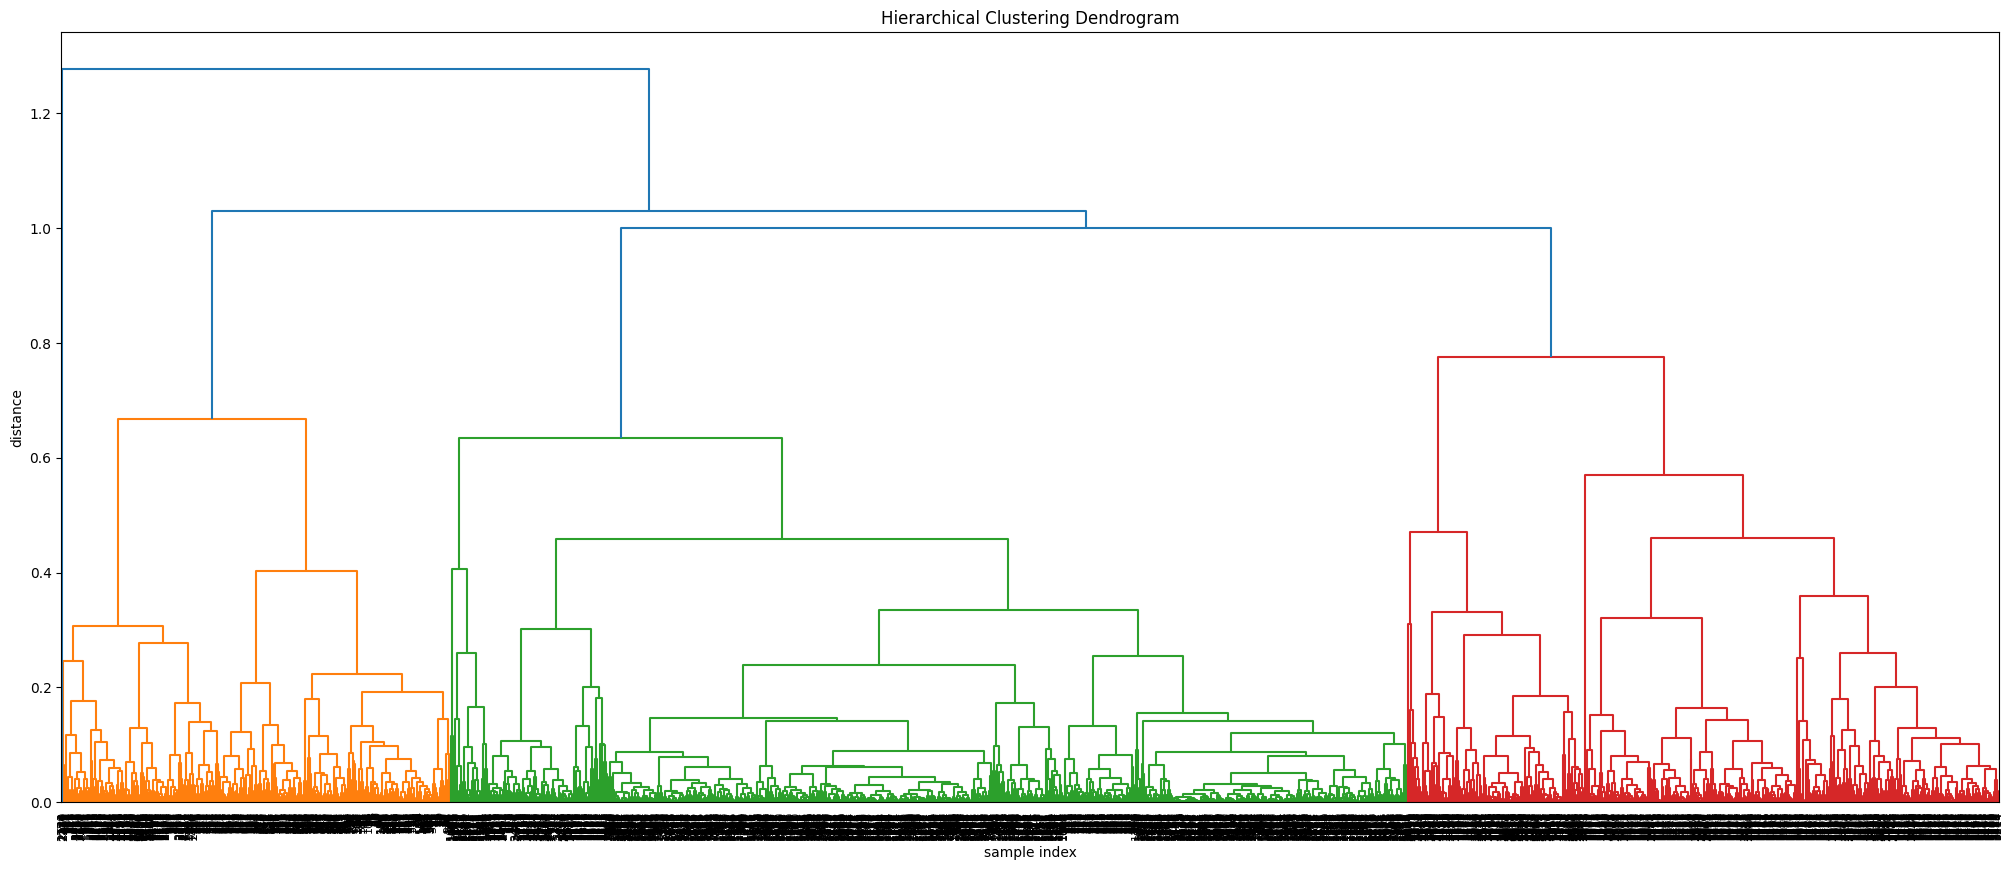

[[0 0 0 ... 7 7 7]]


In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
)
plt.show()

print(cut_tree(hc_complete, n_clusters = 6).T)


In [ ]:
labels = (cut_tree(hc_complete, n_clusters = 6))

In [ ]:
labelspd = pd.DataFrame(labels)
labelspd

In [ ]:
AprFF ['cluster'] = labelspd
AprFF.head()

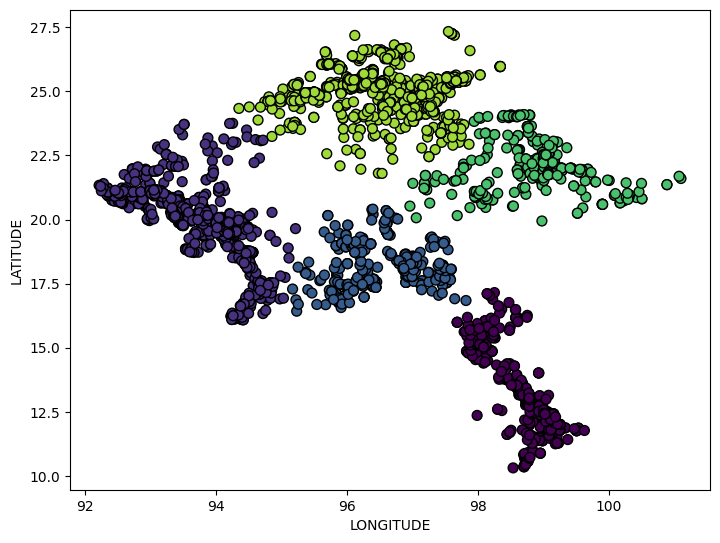

In [ ]:
colors = Apr.cluster

fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 1,1])

ax.scatter(AprFF['LONGITUDE'], AprFF['LATITUDE'], c=colors, edgecolors = 'black', s=50)

ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()

QhullError: ignored

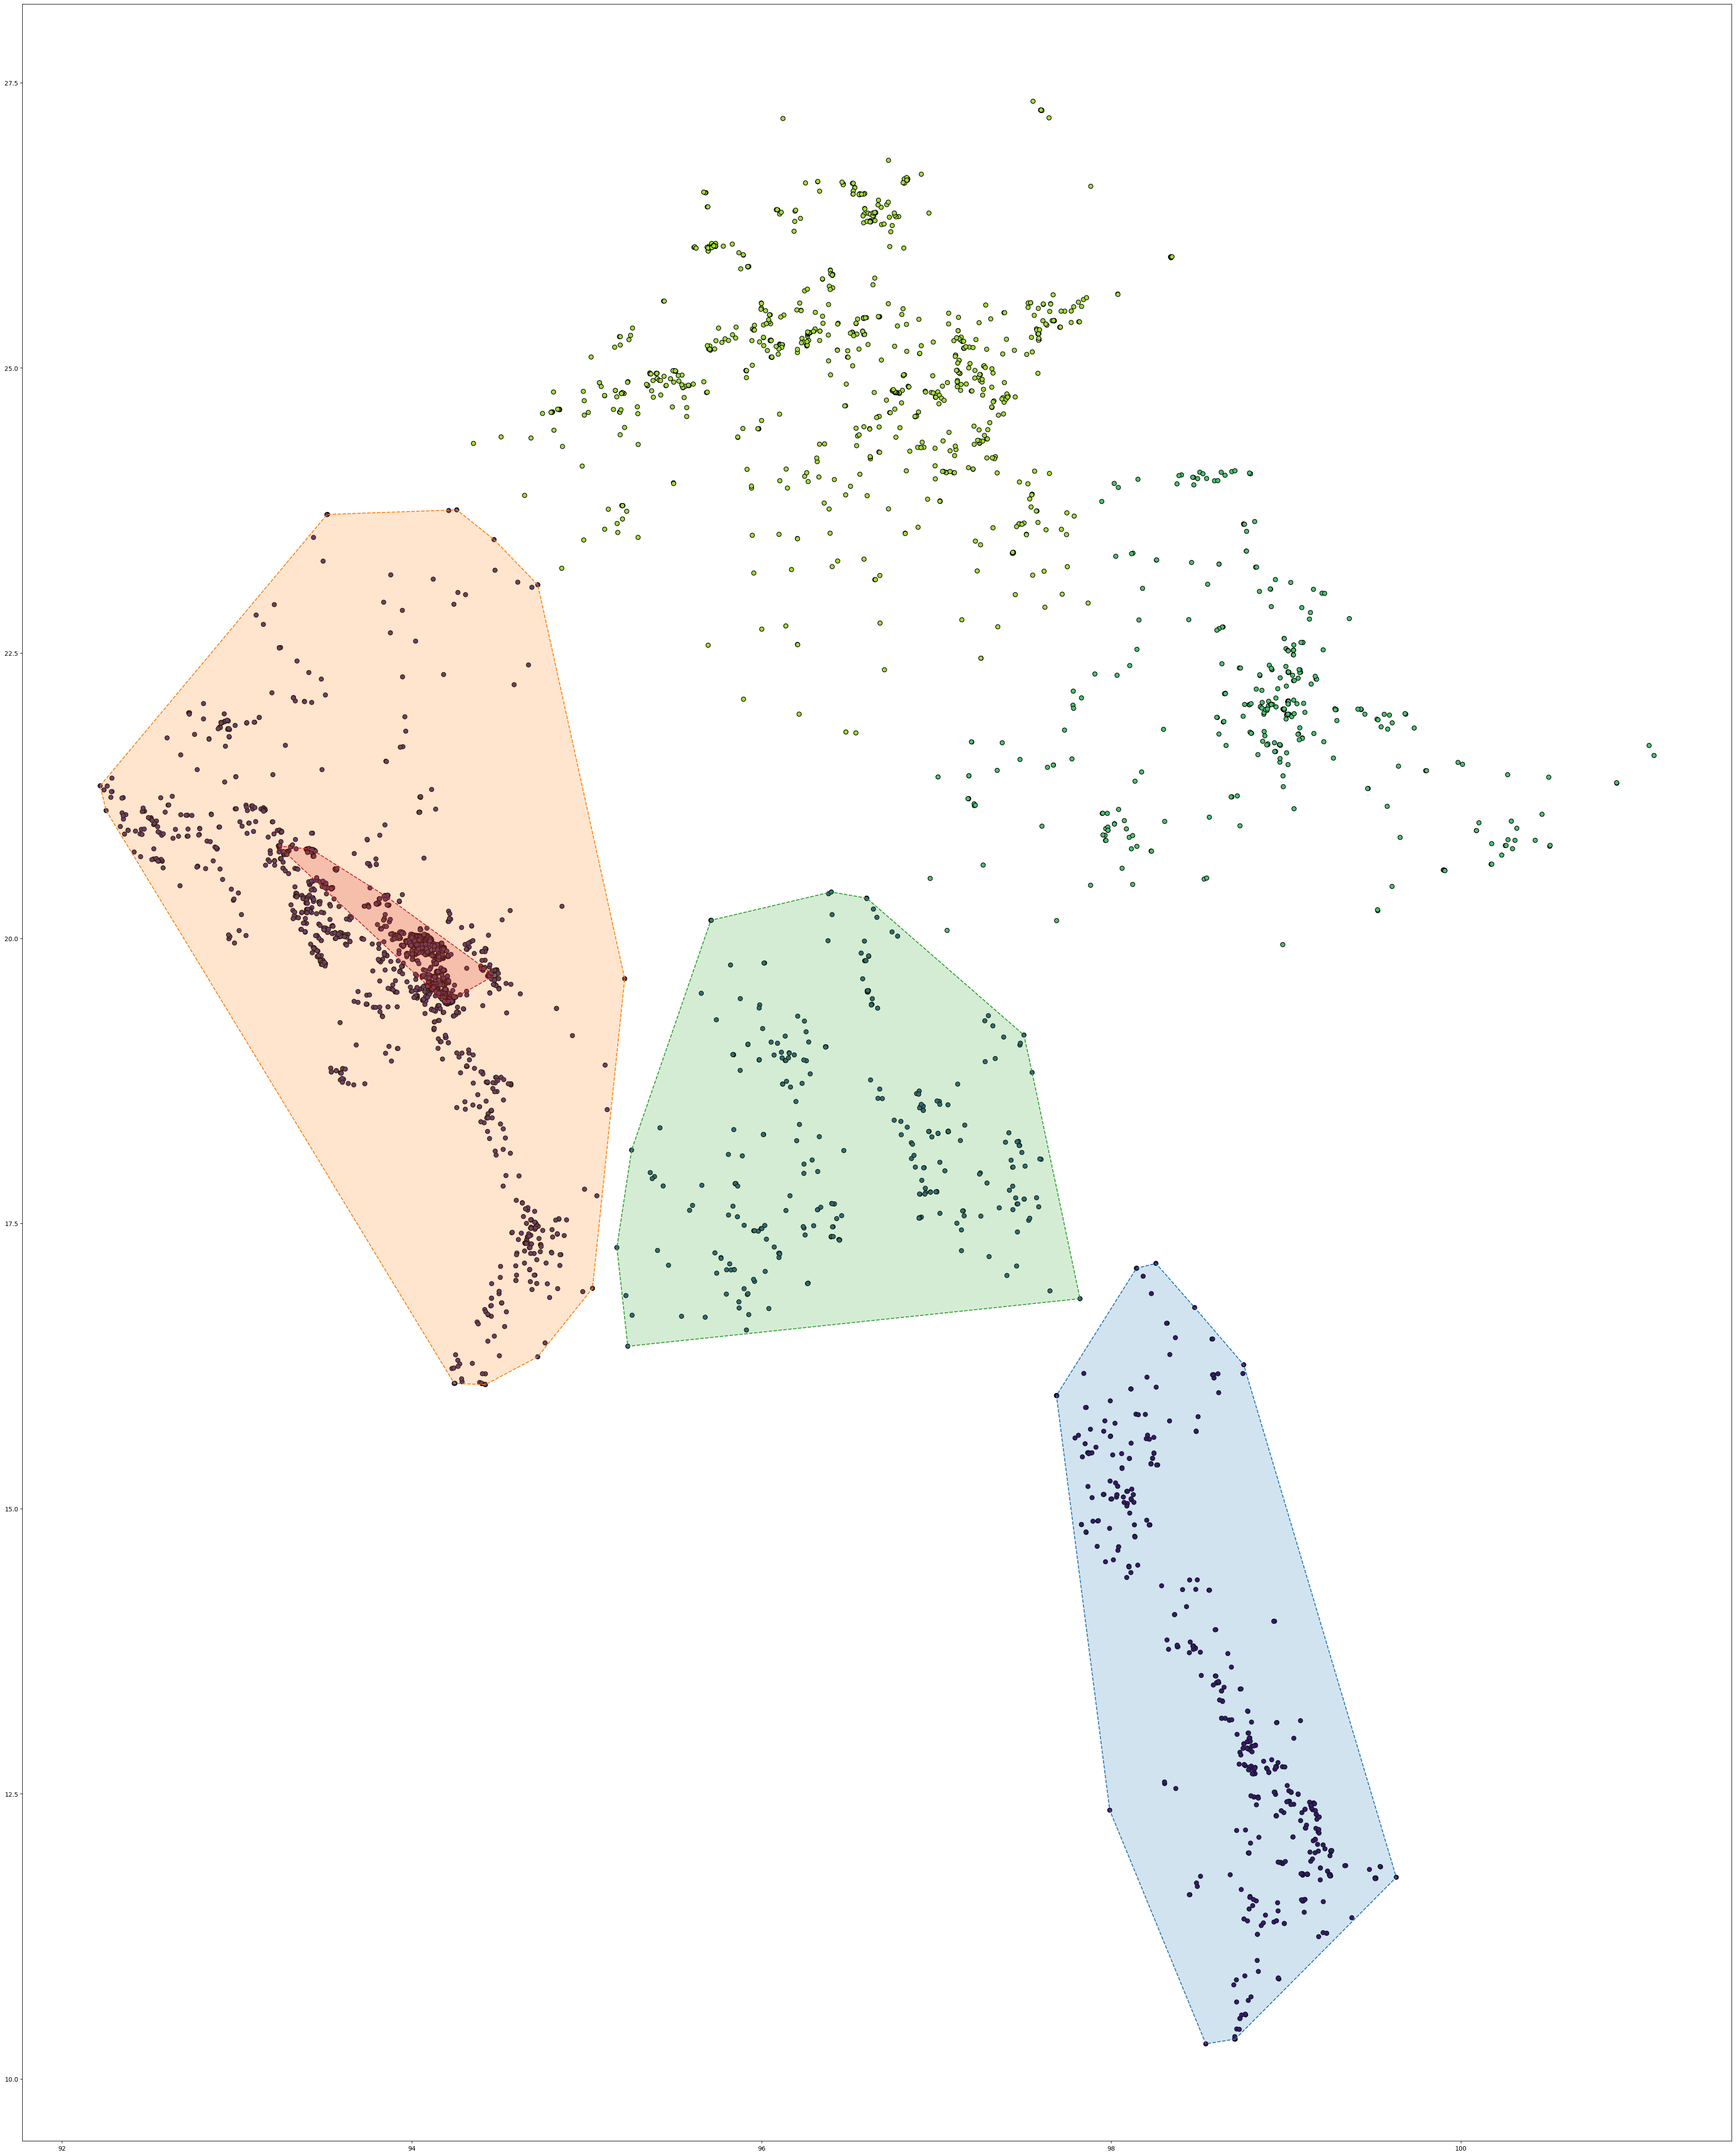

In [ ]:


fig = plt.figure()

ax = fig.add_axes([4, 4, 6, 10])

ax.scatter(AprFF['LONGITUDE'], AprFF['LATITUDE'], c=colors, edgecolors = 'black', s=50)
# ax.scatter(outliers_df['LONGITUDE'], outliers_df['LATITUDE'], c=col_outliers, edgecolors = 'black', s=50)

a =  AprFF.cluster.unique()
#s=np.delete(data.DBSCAN_Clusters.unique(), np.where(a == -1))

for i in a:
    points = AprFF[ MayFF.cluster == i][['LATITUDE', 'LONGITUDE']].values

    hull = ConvexHull(points)

    vert = np.append(hull.vertices,hull.vertices[0])  # close the polygon by appending the first point at the end

    ax.plot(points[vert, 1], points[vert,0 ], '--')
    ax.fill(points[vert, 1], points[vert, 0], alpha=0.2)

ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()

In [ ]:
MayFFscore=silhouette_score(df_aprff,AprFF.cluster)

In [ ]:
print("AprFF:",AprFFscore)

MayFF: 0.5840657213087144


BIRCH

In [ ]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot

In [ ]:
# define the model
model = Birch(threshold=0.01, n_clusters=6)

# fit the model
model.fit(df_aprff)

# assign a cluster to each example
yhat = model.predict(df_aprff)

# retrieve unique clusters
clusters = unique(yhat)

In [ ]:
labelsbirch = pd.DataFrame(yhat)

In [ ]:
AprFF ['cluster_birch'] = labelsbirch
#AprFF.head()

In [ ]:
AprFF.to_csv(r'/content/drive/MyDrive/NSSTC/Fires/KMeans Final/MarFFHir.ipynb\AprFFBirch.csv', index=False)

In [ ]:
AprFFscore_birch=silhouette_score(df_aprff,AprFF.cluster_birch)
print("AprFF_BIRCH:",AprFFscore_birch)

AprFF_BIRCH: 0.5200149398947015
